In [1]:
#Importación de librerías importantes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats import norm


In [2]:
Peces = pd.read_csv('Fish.csv')
Peces

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
Peces.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [4]:
Peces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
Peces.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

#1) CREA UNA COLUMNA QUE INCLUYA EL VOLUMEN DEL PEZ, ASUMIENDOLO COMO UN CILINDRO. PARA UN CILINDRO CON UNA BASE CIRCULAR, EL ÁREA DE LA BASE (A), ES IGUAL A R CUADRADO, DONDE R ES EL RADIO DE LA BASE DEL CILINDRO, Y LA ALTURA (H), ES LA DISTANCIA ENTRE LAS DOS BASES CIRCULARES

In [6]:
Peces["Fishvol"] = np.pi*Peces['Height']*(Peces['Width']/2)**2
Peces

,Species,Weight,Length1,Length2,Length3,Height,Width,Fishvol
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,146.215854
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,181.707071
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,214.391723
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,198.477454
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,257.609344
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,3.188567
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,3.073402
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,2.820291
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,9.641848


#2) VERIFICA LA CORRELACION POSIBLE ENTRE LAS VARIABLES NUMERICA Y GRAFICAMENTE, ¿AUMENTA LA CORRELACION AL AÑADIR EL VOLUMEN? EXPLICA

In [7]:
variables = ["Weight","Length1","Length2","Length3","Height","Width", "Fishvol"]
matriz_correlacion = Peces[variables].corr()

<Axes: >

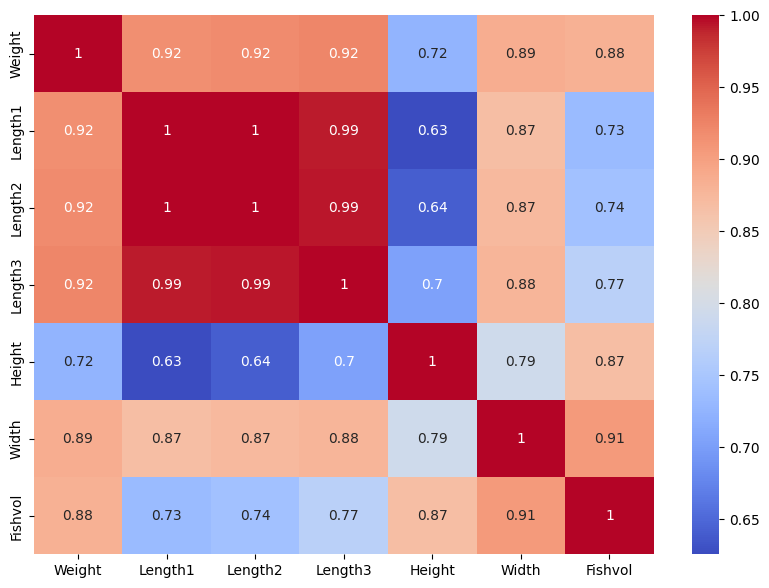

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

sns.heatmap(matriz_correlacion, annot = True, cmap ="coolwarm")

In [9]:
Peces[['Fishvol','Weight']].corr()

,Fishvol,Weight
Fishvol,1.000000,0.881981
Weight,0.881981,1.000000


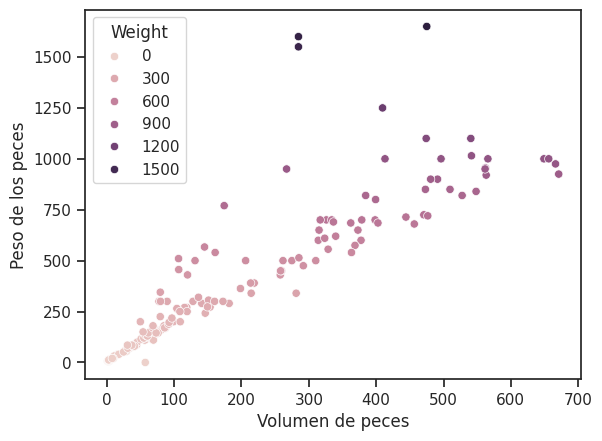

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks')
sns.scatterplot(x='Fishvol', y='Weight', data=Peces, hue='Weight')
plt.xlabel("Volumen de peces")
plt.ylabel("Peso de los peces")
plt.show()

#SEGUN LO OBSERVADO EN EL MODELO DE MAPA DE CALOR SE OBSERVAN RELACIONES ENTRE LAS VARIABLES LENGTH1 (0.99), LENGTH 2 (0.99) Y CON WEIGHT (O.92) CON RESPECTO A  LO CUAL, NOS INDICA QUE LAS LONGUITUDES DE LOS PECES Y EL TAMAÑO ESTÁ RELACIONADO.  ADEMAS, SE OBSERVA UNA RELACIÓN ENTRE WEIGHT Y EL VOLUMEN DE LOS PECES (0.88), LO CUAL, ES UN INDICATIVO DE OBSERVAR EN LA CORRELACIÓN, A TRAVÉS DEL GRÁFICO DE DISPERSIÓN, EL CUAL, INDICA QUE A MEDIDA QUE AUMENTA EL VOLUMEN DE LOS PECES AUMENTA EL PESO DE ÉSTOS


, SE CONCLUYE QUE LAS VARIABLES SE RELACIONAN O ASOCIAN Y QUE

#3) CONSTRUYE UN MODELO DE REGRESION LINEAL QUE RELACIONES EL VOLUMEN  Y EL PESO DE LOS PECES. REALIZA UNA BREVE EVALUACION DEL MODELO Y EXPLICA

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     549.9
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.65e-53
Time:                        19:34:31   Log-Likelihood:                -1040.5
No. Observations:                 159   AIC:                             2085.
Df Residuals:                     157   BIC:                             2091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7401     19.745      2.975      0.0

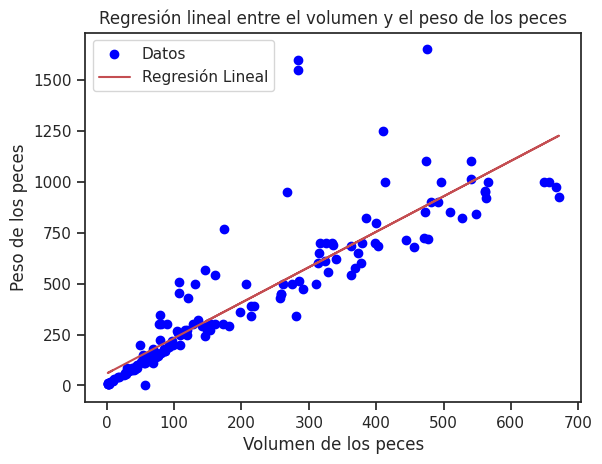

In [13]:
import statsmodels.api as sm

#Definir las variables predictoras (X) y la variable de respuesta (y)
X = Peces["Fishvol"]
y = Peces["Weight"]

# Agregar una constante al predictor (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los resultados del modelo
results = model.summary()

# Imprimir los resultados
print(results)

# Graficar la regresión lineal
plt.scatter(Peces["Fishvol"], Peces["Weight"], label="Datos", color = 'blue')
plt.plot(Peces["Fishvol"], model.predict(X), color='r', label="Regresión Lineal")
plt.title("Regresión lineal entre el volumen y el peso de los peces")
plt.xlabel("Volumen de los peces")
plt.ylabel("Peso de los peces")
plt.legend()
plt.show()


# EN EL MODELO DE REGRESIÓN LINEAL SE PUEDE OBSERVAR QUE EXISTE UNA RELACIÓN O ASOCIACIÓN ENTRE LAS VARIABLES, EL GRÁFICO INDICA QUE A MEDIDA AUMENTA EL VOLÚMEN DE LOS PECES, AUMENTA TAMBIÉN EL PESO. EN CUANTO A LOS DATOS PRESENTADOS EN LA TABLA, EL VALOR DE R CUADRADO NOS INDICA QUE EL MODELO SE AJUSTA BIEN Y TIENE UNA RECTA POSITIVA.

#4) ¿ QUE SUCEDE SI APLICAS EL MODELO ANTERIOR A CADA ESPECIE DE PECES? EXPLICA

In [21]:
import statsmodels.api as sm

#Definir las variables predictoras (X) y la variable de respuesta (y)
X = Peces[['Fishvol','Species']]
y = Peces["Weight"]

# Agregar una constante al predictor (intercepto)
X = sm.add_constant(X)

# Codificar la variable categórica 'Species' usando get dummies
X_encoded = pd.get_dummies(X, columns=['Species'], prefix=['Species'])

# Crear el modelo de regresión lineal
model = sm.OLS(y, X_encoded.astype(float))
model = model.fit()

# Obtener los resultados del modelo
results = model.summary()

predictions = model.predict(X_encoded)

# Calcular el Error Cuadrático Medio (MSE)
mse = ((y - predictions) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE)
emse = mse / ((y - y.mean()) ** 2).mean()

# Obtener el valor R² del modelo
r2 = model.rsquared

print(results)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Error Mean Squared Explicado (EMSE): {emse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     191.5
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           9.58e-72
Time:                        20:02:51   Log-Likelihood:                -978.01
No. Observations:                 159   AIC:                             1972.
Df Residuals:                     151   BIC:                             1997.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                54.1159     13.89

#SEGÚN LO OBSERVADO EN EL MODELO, SE PUEDE CONCLUIR QUE AL SEPARAR LAS EXPECIES SE PUDEN OBSERVAR VALORES NORMALES (<=0.5) EN SEIS ESPECIES DE PECES, SIN EMBARGO, EXISTEN UN VALOR >0.5 EN LA ESPECIE WHITEFISH, LO CUAL, NOS INDICARÍA QUE  EL VOLUMEN NO ESTA RELACIONADO CON EL PESO EN ESTA ESPECIE EN ESPECIFICO. EL COEFICIENTE DE R CUADRADO NOS INDICA QUE EL MODELO ES CONFIABLE

#5) CONSTRUYE UN MODELO DE REGRESIÓN QUE RELACIONE DOS O MÁS VARIABLES CON EL PESO DE LOS PECES. REALIZA UNA BREVE EVALUACIÓN DEL MODELO


In [27]:
#limpiamos las variables
data_limpio = Peces.dropna(subset=['Length3', 'Width'])

# Filtrar los datos por especie (Roach, Whitefish,Smelt,Parkki)
pez_roach = data_limpio[data_limpio['Species'] == 'Roach']
pez_whitefish = data_limpio[data_limpio['Species'] == 'Whitefish']
pez_smelt = data_limpio[data_limpio['Species'] == 'Smelt']
pez_parkki = data_limpio[data_limpio['Species'] == 'Parkki']


# Crear modelos de regresión lineal para cada género y para ambos juntos
model_roach = sm.OLS(pez_roach['Length3'], sm.add_constant(pez_roach['Width'])).fit()
model_whitefish = sm.OLS(pez_whitefish['Length3'], sm.add_constant(pez_whitefish['Width'])).fit()
model_smelt = sm.OLS(pez_smelt['Length3'], sm.add_constant(pez_smelt['Width'])).fit()
model_parkki = sm.OLS(pez_parkki['Length3'], sm.add_constant(pez_parkki['Width'])).fit()
model_todos = sm.OLS(data_limpio['Length3'], sm.add_constant(data_limpio['Width'])).fit()

# Obtener las predicciones de cada modelo
predictions_roach = model_roach.predict()
predictions_whitefish = model_whitefish.predict()
predictions_smelt = model_smelt.predict()
predictions_parkki = model_parkki.predict()
predictions_todos = model_todos.predict()


# Calcular el Error Cuadrático Medio (MSE) para cada modelo
mse_roach = ((pez_roach['Length3'] - predictions_roach) ** 2).mean()
mse_whitefish = ((pez_whitefish['Length3'] - predictions_whitefish) ** 2).mean()
mse_smelt = ((pez_smelt['Length3'] - predictions_smelt) ** 2).mean()
mse_parkki = ((pez_parkki['Length3'] - predictions_parkki) ** 2).mean()
mse_todos = ((data_limpio['Length3'] - predictions_todos) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE) para cada modelo
emse_roach = mse_roach / ((pez_roach['Length3'] - pez_roach['Length3'].mean()) ** 2).mean()
emse_whitefish = mse_whitefish / ((pez_whitefish['Length3'] - pez_whitefish['Length3'].mean()) ** 2).mean()
emse_smelt = mse_smelt / ((pez_smelt['Length3'] - pez_smelt['Length3'].mean()) ** 2).mean()
emse_parkki = mse_parkki / ((pez_parkki['Length3'] - pez_parkki['Length3'].mean()) ** 2).mean()
emse_todos = mse_todos / ((data_limpio['Length3'] - data_limpio['Length3'].mean()) ** 2).mean()

# Calcular el Coeficiente de Determinación (R²) para cada modelo
r2_roach = model_roach.rsquared
r2_whitefish = model_whitefish.rsquared
r2_smelt = model_smelt.rsquared
r2_parkki = model_parkki.rsquared
r2_todos = model_todos.rsquared

# Calcular el Error Absoluto Medio (MAE) para cada modelo
mae_roach = (abs(pez_roach['Length3'] - predictions_roach)).mean()
mae_whitefish = (abs(pez_whitefish['Length3'] - predictions_whitefish)).mean()
mae_smelt = (abs(pez_smelt['Length3'] - predictions_smelt)).mean()
mae_parkki = (abs(pez_parkki['Length3'] - predictions_parkki)).mean()
mae_todos = (abs(data_limpio['Length3'] - predictions_todos)).mean()


# Mostrar los resultados
print("Modelo para Peces Roach:")
print(f"R²: {r2_roach:.2f}, MSE: {mse_roach:.2f}, EMSE: {emse_roach:.2f}, MAE: {mae_roach:.2f}")

print("\nModelo para Peces Whitefish:")
print(f"R²: {r2_whitefish:.2f}, MSE: {mse_whitefish:.2f}, EMSE: {emse_whitefish:.2f}, MAE: {mae_whitefish:.2f}")


print("Modelo para Peces Smelt:")
print(f"R²: {r2_smelt:.2f}, MSE: {mse_smelt:.2f}, EMSE: {emse_smelt:.2f}, MAE: {mae_smelt:.2f}")



print("\nModelo para Peces Parkki:")
print(f"R²: {r2_parkki:.2f}, MSE: {mse_parkki:.2f}, EMSE: {emse_parkki:.2f}, MAE: {mae_parkki:.2f}")


print("\nModelo para todas las especies:")
print(f"R²: {r2_todos:.2f}, MSE: {mse_todos:.2f}, EMSE: {emse_todos:.2f}, MAE: {mae_todos:.2f}")

Modelo para Peces Roach:
R²: 0.93, MSE: 1.08, EMSE: 0.07, MAE: 0.83

Modelo para Peces Whitefish:
R²: 0.74, MSE: 7.87, EMSE: 0.26, MAE: 1.81
Modelo para Peces Smelt:
R²: 0.67, MSE: 0.61, EMSE: 0.33, MAE: 0.71

Modelo para Peces Parkki:
R²: 0.97, MSE: 0.49, EMSE: 0.03, MAE: 0.52

Modelo para todas las especies:
R²: 0.77, MSE: 30.57, EMSE: 0.23, MAE: 3.59


#SEGÚN LO OBSERVADO EN EL MODELO, SE PUEDE CONCLUIR QUE EL MODELO PARA PECES ROACH (0.93) Y SPARKI (0.97) TIENEN EL R CUADRADO QUE MEJOR SE AJUSTA AL MODELO, LO CUAL, NOS INDICA QUE EXISTE UNA RELACIÓN O ASOCIACIÓN FUERTE ENTRE LAS VARIABLES LENGHT3 Y WIDTH.

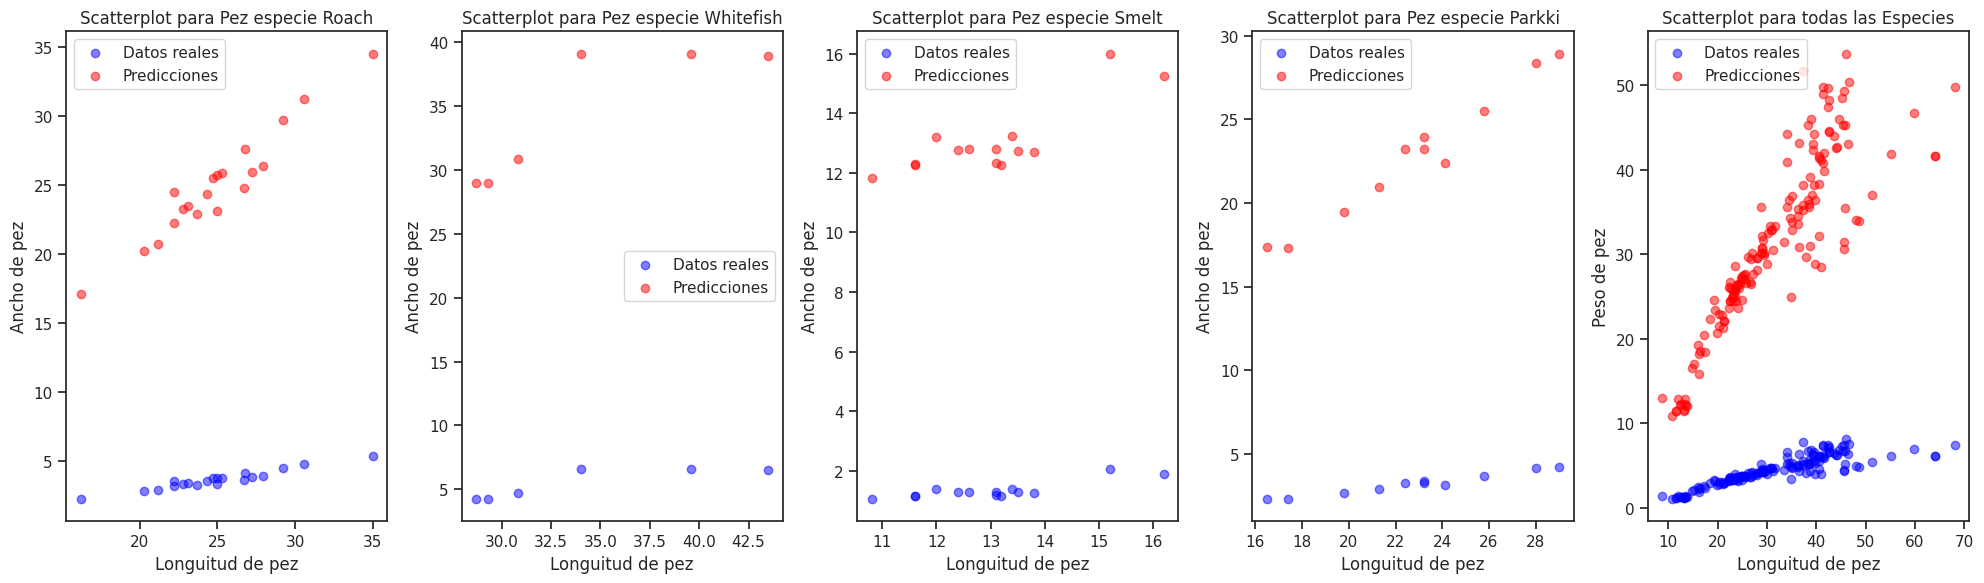

In [29]:
#Se realiza gráfico de lo anteriormente analizado
# Scatterplot para los peces roach
plt.figure(figsize=(20, 6))
plt.subplot(1, 5, 1)
plt.scatter(pez_roach['Length3'], pez_roach['Width'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(pez_roach['Length3'], predictions_roach, label='Predicciones', color='red', alpha=0.5)


plt.xlabel('Longuitud de pez')
plt.ylabel('Ancho de pez')
plt.title('Scatterplot para Pez especie Roach')
plt.legend()

# Scatterplot para los peces Whitefish
plt.subplot(1, 5, 2)
plt.scatter(pez_whitefish['Length3'], pez_whitefish['Width'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(pez_whitefish['Length3'], predictions_whitefish, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Longuitud de pez')
plt.ylabel('Ancho de pez')
plt.title('Scatterplot para Pez especie Whitefish')
plt.legend()


# Scatterplot para los peces Smelt
plt.subplot(1, 5, 3)
plt.scatter(pez_smelt['Length3'], pez_smelt['Width'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(pez_smelt['Length3'], predictions_smelt, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Longuitud de pez')
plt.ylabel('Ancho de pez')
plt.title('Scatterplot para Pez especie Smelt')
plt.legend()

# Scatterplot para los peces Parkki
plt.subplot(1, 5, 4)
plt.scatter(pez_parkki['Length3'], pez_parkki['Width'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(pez_parkki['Length3'], predictions_parkki, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Longuitud de pez')
plt.ylabel('Ancho de pez')
plt.title('Scatterplot para Pez especie Parkki')
plt.legend()




# Scatterplot para todas las especies juntas
plt.subplot(1, 5, 5)
plt.scatter(data_limpio['Length3'], data_limpio['Width'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(data_limpio['Length3'], predictions_todos, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Longuitud de pez')
plt.ylabel('Peso de pez')
plt.title('Scatterplot para todas las Especies')
plt.legend()

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los scatterplots
plt.tight_layout()
plt.show()

